# EE0005 Project Group 1 (Chest X-Ray Images Dataset)

### This dataset contains various images of normal and pneumonia infected lungs consisting of 5216 training data and 624 testing data with various dimensions.

## Import all the necessary libraries

In [12]:
import os                                                                           # os library is used for creating directories, navigating directories, etc.
import random                                                                       # random is used to randomize data
import numpy as np                                                                  # Numpy is used to process data.
import pandas as pd                                                                 # Pandas is used to process data.
import tensorflow as tf                                                             # TensorFlow library is used for creating neural network models.
import matplotlib.pyplot as plt                                                     # Matplotlib is used to create plots and visualize data.
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator                 # ImageDataGenerator generates data used in the TensorFlow model in real time.

## Getting close and personal with the data

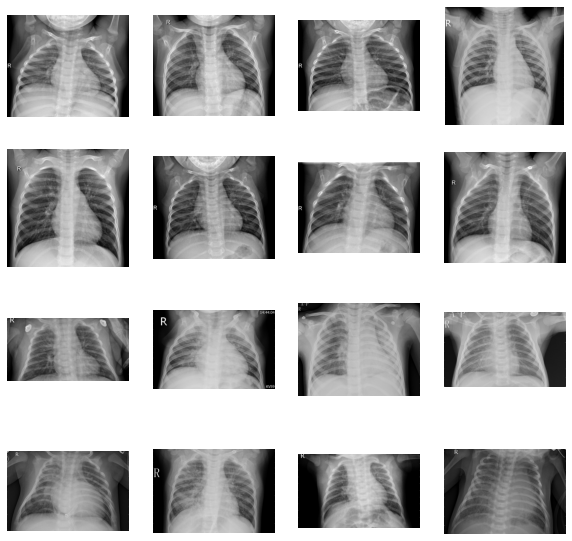

In [11]:
normal = 'data/chest_xray/train/NORMAL/'                                            # Defines the normal lung images directory
pneumonia = 'data/chest_xray/train/PNEUMONIA/'                                      # Defines the pneumonia infected lung images directory
rand_img = [normal+i for i in random.sample(os.listdir(normal),8)]                  # Samples 8 images from the normal lung images
rand_img += [pneumonia+i for i in random.sample(os.listdir(pneumonia),8)]           # Samples 8 images from the pneumonia infected lung images
col = row = 4                                                                       # Defines the number of columns and rows
fig=plt.figure(figsize=(10, 10))                                                    # Sets the figure size of the plot
for i in range(1, col*row +1):                                                      # Iterates through the position in the plot
    fig.add_subplot(row, col, i)                                                    # Adds a subplot in the ith position
    plt.imshow(tf.keras.preprocessing.image.load_img(rand_img[i-1]), cmap='gray')   # Loads a random image
    plt.axis('off')                                                                 # Disables the subplot axis
plt.show()                                                                          # Shows the plot

## "Mean" of the images

In [12]:
mean_generator = ImageDataGenerator(rescale = 1./255.)                                  # Creates an image generator to compute mean image.
normal_mean_generator = mean_generator.flow_from_directory('data/chest_xray/train',            # Connects the training image data generator to the training images' directory.
                                       classes=['NORMAL'],
                                       target_size=(200,200),          # Sets the target size of the images to be 200x200.
                                       batch_size=1,                   # Sets the number of images to be generated per batch.
                                       class_mode='binary')            # Sets the classification mode to be binary since the predictions only consists of 2 classes.
pneumonia_mean_generator = mean_generator.flow_from_directory('data/chest_xray/train',            # Connects the training image data generator to the training images' directory.
                                       classes=['PNEUMONIA'],
                                       target_size=(200,200),          # Sets the target size of the images to be 200x200.
                                       batch_size=1,                   # Sets the number of images to be generated per batch.
                                       class_mode='binary')            # Sets the classification mode to be binary since the predictions only consists of 2 classes.

Found 1341 images belonging to 1 classes.
Found 3875 images belonging to 1 classes.


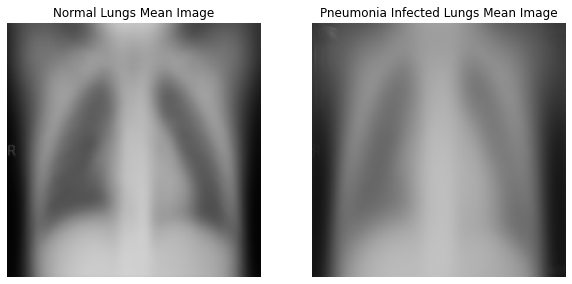

In [13]:
normal_mean_img = np.mean([normal_mean_generator[i][0].squeeze() for i in range(len(normal_mean_generator))], axis=0)
pneumonia_mean_img = np.mean([pneumonia_mean_generator[i][0].squeeze() for i in range(len(pneumonia_mean_generator))], axis=0)
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(normal_mean_img)
plt.title('Normal Lungs Mean Image')
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(pneumonia_mean_img)
plt.title('Pneumonia Infected Lungs Mean Image')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Difference Between the Normal\nand Pneumonia Average')

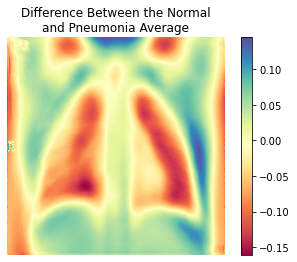

In [14]:
difference = np.mean(normal_mean_img-pneumonia_mean_img, axis=2)
plt.imshow(difference, cmap = 'Spectral')
plt.colorbar()
plt.axis('off')
plt.title("Difference Between the Normal\nand Pneumonia Average")

## Define the model

In [15]:
model = tf.keras.models.Sequential([                                                # Define a model called model.
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)),  # Add a Conv2D layer with 32 filters, input shape 200x200x3, and relu activation.
    tf.keras.layers.MaxPooling2D(2,2),                                              # Add a max pooling layer to compress image and extract features.
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),                            # Add a Conv2D layer with 64 filters and relu activation.
    tf.keras.layers.MaxPooling2D(2,2),                                              # Add a max pooling layer to compress image and extract features.
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),                           # Add a Conv2D layer with 128 filters and relu activation.
    tf.keras.layers.MaxPooling2D(2,2),                                              # Add a max pooling layer to compress image and extract features.
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),                           # Add a Conv2D layer with 128 filters and relu activation.
    tf.keras.layers.MaxPooling2D(2,2),                                              # Add a max pooling layer to compress image and extract features.
    tf.keras.layers.Flatten(),                                                      # Flatten the image matrix into a matrix with width 1.
    tf.keras.layers.Dropout(0.5),                                                   # Add a dropout layer that randomly sets input units to 0 to prevent overfitting.
    tf.keras.layers.Dense(512, activation='relu'),                                  # Create a Dense layer with 512 units with relu activation function.
    tf.keras.layers.Dense(1, activation='sigmoid')])                                # Create a Dense layer with 1 unit for output with sigmoid activation function.
    
model.compile(optimizer = 'adam',                                                   # Compiles the model with adam optimizer.
              loss = 'binary_crossentropy',                                         # Selects binary crossentropy as the loss function to minimize. 
              metrics = ['accuracy'])                                               # Sets accuracy as the metrics.

model.summary()                                                                     # Prints a summary of the model.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)      

In [16]:
input_img = tf.keras.preprocessing.image.load_img(random.sample(rand_img,1)[0], target_size=(200,200))

In [17]:
input_img = tf.keras.preprocessing.image.img_to_array(input_img)
input_img = np.array([input_img])

In [18]:
layer_outputs = [i.output for i in model.layers] #take outputs of each layer
output_visualization_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)#declare visualization model
outputs = output_visualization_model.predict(input_img) #output of visualization model is output of each layer

D:\Programs\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


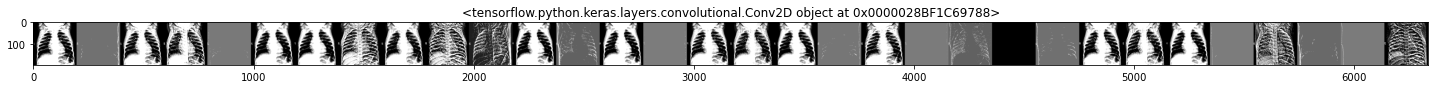

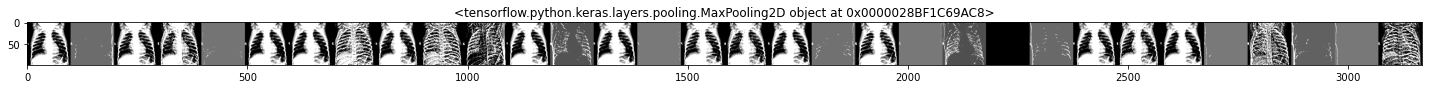

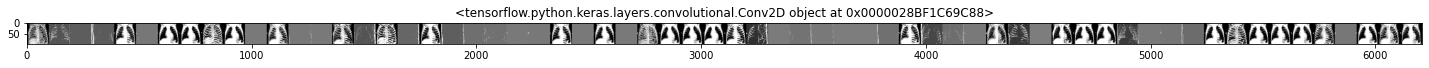

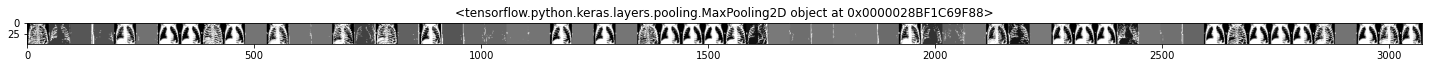

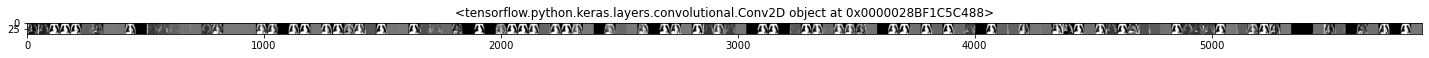

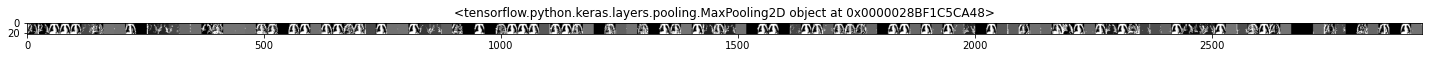

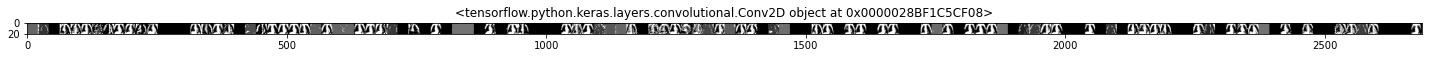

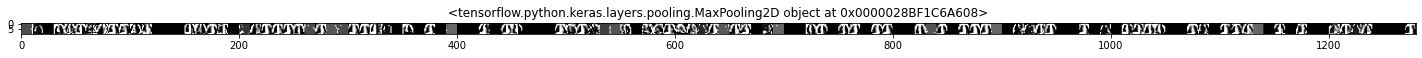

In [31]:
for layer_name, output in zip([i for i in model.layers], outputs):
    if len(output.shape)==4: #feature_map.shape = [1,size,size,n_features]
        size = output.shape[1] 
        feats = output.shape[-1]
        output_matrix = np.zeros((size, size * feats))
        for i in range(feats):
            x = output[0,:,:,i]
            x = (((x-x.mean())/x.std())*255+128)
            x = np.clip(x,0,255).astype('uint8')
            output_matrix[:, i * size : (i + 1) * size] = x
        scale = 25 / feats
        plt.figure(figsize=(scale*feats,scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(output_matrix, aspect = 'auto', cmap='gray')

## Create the data generators for the model

In [58]:
base_dir = 'data/chest_xray'                                                        # Sets the base directory for the train and test folders.
train_dir = os.path.join(base_dir, 'train')                                         # Sets the training directory to be base_dir+'train'.
test_dir = os.path.join(base_dir, 'test')                                           # Sets the testing directory to be base_dir+'test'.

train_datagen = ImageDataGenerator(rescale = 1./255.,                               # Creates a training image data generator, and rescaling the pixel values of the images to be 0 to 1 rather than 0 to 255.
                                   rotation_range = 10,                             # Randomly rotates the images + or - 10 degrees to increase training accuracy.
                                   width_shift_range = 0.2,                         # Randomly shifts images to the left or right to increase training accuracy.
                                   height_shift_range = 0.2,                        # Randomly shifts images to the top or bottom to increase training accuracy.
                                   shear_range = 0.2,                               # Randomly skews the image to increase training accuracy.
                                   zoom_range = 0.2,                                # Randomly zooms images to increase training accuracy.
                                   horizontal_flip = True)                          # Randomoly flips images horizontally to increase training accuracy.

test_datagen = ImageDataGenerator(rescale=1./255)                                   # Creates a testing image data generator, and rescaling the pixel values of the images to be 0 to 1 rather than 0 to 255.

train_generator = train_datagen.flow_from_directory(train_dir,                      # Connects the training image data generator to the training images' directory.
                                                    target_size=(200,200),          # Sets the target size of the images to be 200x200.
                                                    batch_size=32,                  # Sets the number of images to be generated per batch.
                                                    class_mode='binary')            # Sets the classification mode to be binary since the predictions only consists of 2 classes.

test_generator = test_datagen.flow_from_directory(test_dir,                         # Connects the testing image data generator to the testing images' directory.
                                                        target_size=(200,200),      # Sets the target size of the images to be 200x200.
                                                        batch_size=32,              # Sets the number of images to be generated per batch.
                                                  shuffle = False,
                                                        class_mode='binary')        # Sets the classification mode to be binary since the predictions only consists of 2 classes.

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Fit the model

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(                     # Creates a callback to save the model for each epoch as checkpoints.
    filepath='checkpoint/model.{epoch:02d}-{val_loss:.2f}-{val_accuracy:.2f}.h5',   # Sets the file path of the model checkpoints.
    save_weights_only=False,                                                        # Save the entire model instead of the weights only.
    monitor='val_accuracy',                                                         # Monitors the val_accuracy.
    mode='max',                                                                     # Sets mode for monitoring the val_accuracy to max.
    save_best_only=True)                                                            # Save the model with the best val_accuracy so far.

history = model.fit(                                                                # Fits the model.
            train_generator,                                                        # Fits the model to the training generator.
            validation_data = test_generator,                                       # Validate the model to the testing generator.
            steps_per_epoch = 160,                                                  # Sets the number of steps to be 160 per epoch(a step is a gradient update).
            epochs =50,                                                             # Sets the number of epochs to be 50(an epoch is a pass on the entire dataset).
            validation_steps = 18,                                                  # Sets the number of validation steps to be 18.
            verbose = 1,                                                            # Sets the verbose to be 1(Displays the progress bar of the epoch).
            callbacks=[model_checkpoint_callback])                                  # Adds the callback to create checkpoints.

## Model accuracy and loss

In [ ]:
statistics = pd.DataFrame(data=history.history)                                     # Create a dataframe containing the loss and accuracy
statistics['epoch'] = [i for i in range(1,51)]                                      # Creates an epoch column
statistics.set_index('epoch')                                                       # Sets epoch column as the index
statistics.to_csv("checkpoint/Model_statistics.csv",index=False)                    # Saves the dataframe to a .csv file

In [ ]:
f, ax = plt.subplots(figsize = (16,10))                                             # Create a matplotlib plot
ax.plot(statistics['epoch'], statistics['accuracy'], 'r', label='Training accuracy')         # Plot the training accuracy
ax.plot(statistics['epoch'], statistics['val_accuracy'], 'b', label='Validation accuracy')   # Plot the validation accuracy
ax.set_ylabel("Accuracy")                                                           # Name the y axes of the plot
ax.set_xlabel("Epoch")                                                              # Name the x axes of the plot
plt.title('Training and validation accuracy')                                       # Set the title of the plot
plt.legend(loc=0)                                                                   # Add a legend to the plot
plt.show()                                                                          # Show the plot

In [ ]:
f, ax = plt.subplots(figsize = (16,10))                                             # Create a matplotlib plot
ax.plot(statistics['epoch'], statistics['loss'], 'r', label='Training loss')        # Plot the training loss
ax.plot(statistics['epoch'], statistics['val_loss'], 'b', label='Validation loss')  # Plot the validation loss
ax.set_ylabel("Loss")                                                               # Name the y axes of the plot
ax.set_xlabel("Epoch")                                                              # Name the x axes of the plot
plt.title('Training and validation loss')                                           # Set the title of the plot
plt.legend(loc=0)                                                                   # Add a legend to the plot
plt.show()                                                                          # Show the plot

## Choose the best model from the checkpoints

In [6]:
models = sorted(os.listdir('checkpoint'))                                                   # List all the checkpoints
model = tf.keras.models.load_model(os.path.join("checkpoint",models[-1]), compile = False)  # Import the best checkpoint
 
for layer in model.layers:                                                                  # Iterate through the layers of the model
    layer.trainable = False                                                                 # Disable training on the layers

model.compile(optimizer = "adam",                                                           # Compile the model with adam optimizer
              loss = 'binary_crossentropy',                                                 # Set the loss of the model to binary crossentropy
              metrics = ['accuracy'])                                                       # Set the metrics of the model to accuracy

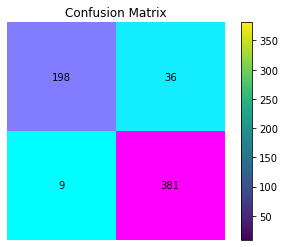

In [62]:
pred = model.predict(test_generator)
pred = np.round(pred)
matrix = confusion_matrix(test_generator.classes, pred)
fig, ax = plt.subplots()
plt.title("Confusion Matrix")
plt.colorbar(plt.imshow(matrix))
ax.imshow(matrix, cmap = "cool")
ax.axis('off')
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, matrix[i, j],
                       ha="center", va="center", color="black")

In [73]:
TN = matrix[0][0]
TP = matrix[1][1]
FN = matrix[1][0]
FP = matrix[0][1]
print("True Negative: {}\t True Positive: {}".format(TN,TP))
print("False Negative: {}\t False Positive: {}\n".format(FN,FP))
print("False Positive Rate: {:.4f}".format(FP/(FP+TN)))
print("False Negative Rate: {:.4f}\n".format(FN/(FN+TP)))
print("Test Accuracy: {:.5f}".format((TP+TN)/(TP+TN+FN+FP)))

True Negative: 198	 True Positive: 381
False Negative: 9	 False Positive: 36

False Positive Rate: 0.1538
False Negative Rate: 0.0231

Test Accuracy: 0.92788
